# **Predictive Analytics: Machine Learning for Real Estate Valuation**

# **Libraries & Data Loading**

---



**Libraries Loading**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE # Recursive Feature Elimination

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuration for minimal plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
import warnings
warnings.filterwarnings('ignore')

print("Libraries Loaded Successfully.")

Libraries Loaded Successfully.


**Dataset Loading**

In [129]:
#Load Dataset
df = pd.read_csv("/content/USA_Housing.csv")
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (5000, 7). This dataset contains 5000 rows and 7 columns.


**Initial Data Loading**

In [130]:
# Dataset shape
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 5000
Number of columns: 7


In [131]:
# Column names
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [132]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [133]:
# Descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


# **Data Cleaning**

---



In [134]:
# Checking missing values
df.isnull().sum().sort_values(ascending=False)

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [135]:
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [136]:
# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# We look for rows where ALL columns are identical
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

# Remove the duplicates
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed successfully.")
else:
    print("No duplicates found.")

# Check the number of rows after
print(f"Rows after removing duplicates: {df.shape[0]}")

Number of duplicate rows: 0
Number of duplicate rows found: 0
No duplicates found.
Rows after removing duplicates: 5000


In [137]:
df.describe(percentiles=[0.01, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,43792.673024,6.880429e+04,9.376370e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,3.648537,5.970429e+00,8.274282e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,4.620750,7.002902e+00,9.295532e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,2.020000,4.050000e+00,6.460000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,13983.282591,3.619941e+04,5.997511e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,404973.038260,1.232669e+06,2.050598e+06,2.469066e+06


In [138]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [139]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [140]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [141]:
df['Bedrooms_Int'] = df['Avg. Area Number of Bedrooms'].round().astype(int)

categories = df['Bedrooms_Int'].unique()
categories.sort()

print("Unique Bedroom Counts in this dataset:")
print(categories)

Unique Bedroom Counts in this dataset:
[2 3 4 5 6]


In [142]:
df.nunique()

,0
Avg. Area Income,5000
Avg. Area House Age,5000
Avg. Area Number of Rooms,5000
Avg. Area Number of Bedrooms,255
Area Population,5000
Price,5000
Address,5000
Bedrooms_Int,5


# **Feature Names and its Datatypes**

---



In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
 7   Bedrooms_Int                  5000 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


# **Data Spliting**

---



In [144]:
numerical_data = df.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Bedrooms_Int']


In [145]:
categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 1 categorical features: 

['Address']


# **Descriptive Analysis**
---
**Summary statics of Numerical Featrues**



In [146]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06
Bedrooms_Int,5000.0,3.741200e+00,1.228057,2.000000,3.000000,4.000000e+00,4.000000e+00,6.000000e+00


**Summary statics of Categorical Featrues**

In [147]:
categorical_data.describe().T

,count,unique,top,freq
Address,5000,5000,"37778 George Ridges Apt. 509\nEast Holly, NV 2...",1


**Variance of each numerical features**

In [148]:
numerical_data.var()

,0
Avg. Area Income,1.135928e+08
Avg. Area House Age,9.829854e-01
Avg. Area Number of Rooms,1.011700e+00
Avg. Area Number of Bedrooms,1.523095e+00
Area Population,9.851853e+07
Price,1.246921e+11
Bedrooms_Int,1.508124e+00


**Skew in numerical features**

In [149]:
numerical_data.skew()

,0
Avg. Area Income,-0.033720
Avg. Area House Age,-0.007214
Avg. Area Number of Rooms,-0.040996
Avg. Area Number of Bedrooms,0.376240
Area Population,0.050650
Price,-0.002718
Bedrooms_Int,0.369760


In [150]:
unique_counts=categorical_data.nunique()
print(unique_counts)

Address    5000
dtype: int64


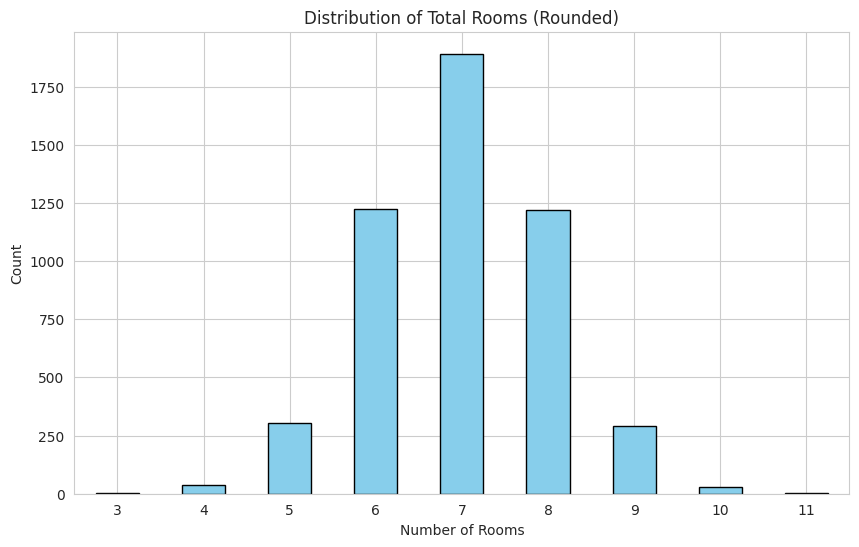

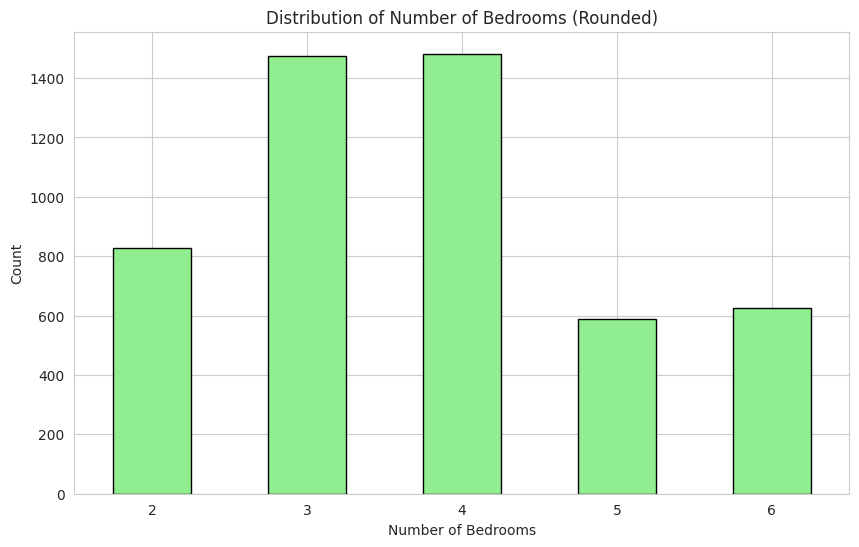

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = pd.read_csv('USA_Housing.csv')

df_viz['Bedrooms_Int'] = df_viz['Avg. Area Number of Bedrooms'].round().astype(int)
df_viz['Rooms_Int'] = df_viz['Avg. Area Number of Rooms'].round().astype(int)

plt.figure(figsize=(10, 6))

df_viz['Rooms_Int'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', rot=0)

plt.title('Distribution of Total Rooms (Rounded)')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))

filtered_bedrooms = df_viz[df_viz['Bedrooms_Int'].between(2, 6)]['Bedrooms_Int']

filtered_bedrooms.value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black', rot=0)

plt.title('Distribution of Number of Bedrooms (Rounded)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

In [152]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Bedrooms_Int
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734,0.021151
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543,0.005506
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664,0.467609
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071,0.991468
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556,-0.020843
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000,0.173528
Bedrooms_Int,0.021151,0.005506,0.467609,0.991468,-0.020843,0.173528,1.000000


**Check Kurtosis**

In [153]:
print("Kurtosis of Numerical Features:")
print(numerical_data.kurt())

Kurtosis of Numerical Features:
Avg. Area Income                0.045574
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.074652
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.006733
Price                          -0.054918
Bedrooms_Int                   -0.730956
dtype: float64


# **EDA with Histograms and KDE Plots**

---



**Histograms**

Plotting graphs for: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Bedrooms_Int']


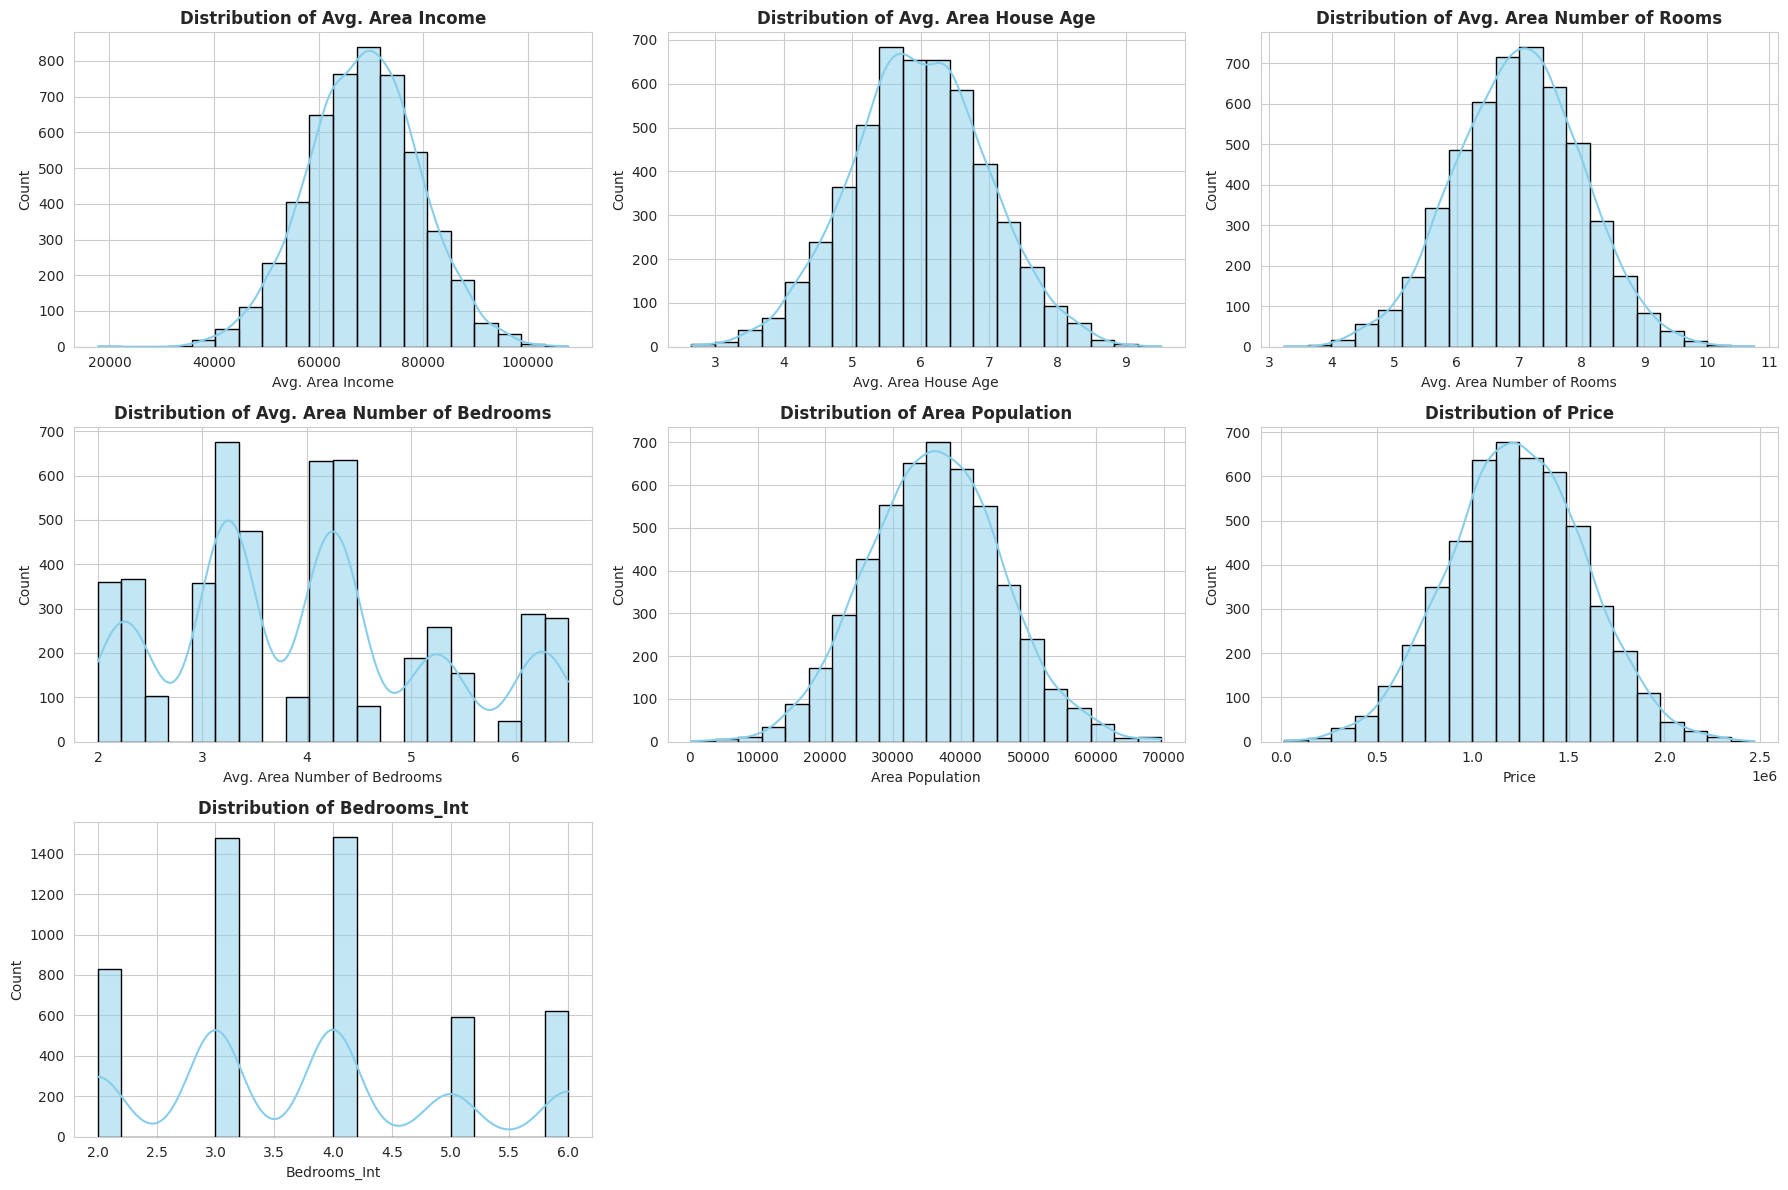

In [154]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

cols_to_exclude = ['City_Code', 'Location_Code', 'Occupancy_status']
numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

print(f"Plotting graphs for: {numerical_cols}")

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black', bins=20)

    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

**Box-Plot**

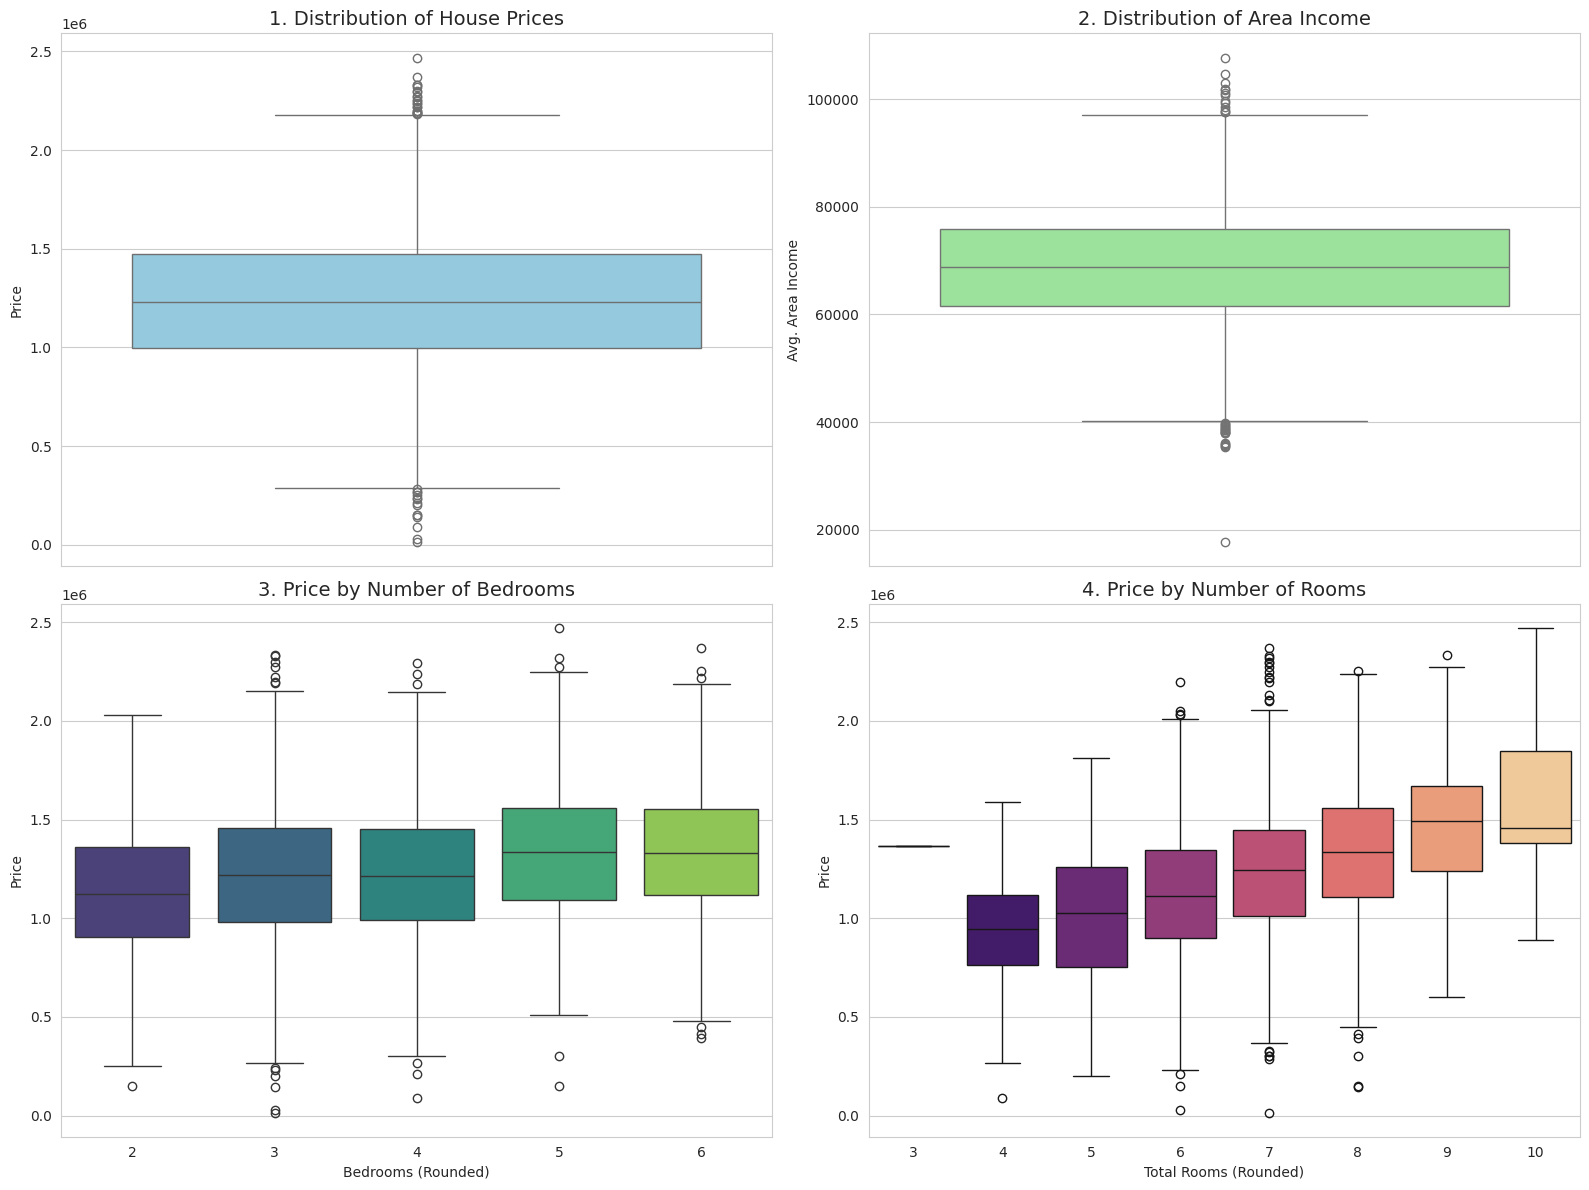

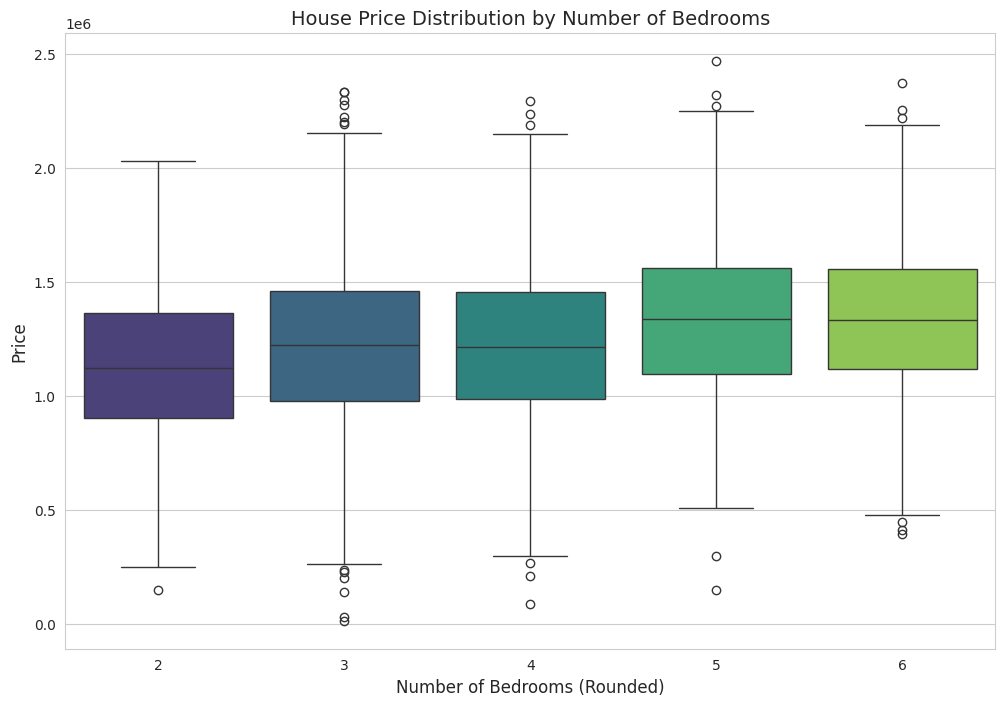

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = df.copy()
df_viz['Bedrooms_Int'] = df_viz['Avg. Area Number of Bedrooms'].round().astype(int)
df_viz['Rooms_Int'] = df_viz['Avg. Area Number of Rooms'].round().astype(int)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(y=df_viz['Price'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('1. Distribution of House Prices', fontsize=14)
axes[0, 0].set_ylabel('Price')

sns.boxplot(y=df_viz['Avg. Area Income'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('2. Distribution of Area Income', fontsize=14)
axes[0, 1].set_ylabel('Avg. Area Income')

subset_bed = df_viz[df_viz['Bedrooms_Int'].between(2, 6)]
sns.boxplot(x='Bedrooms_Int', y='Price', data=subset_bed, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('3. Price by Number of Bedrooms', fontsize=14)
axes[1, 0].set_xlabel('Bedrooms (Rounded)')
axes[1, 0].set_ylabel('Price')

subset_room = df_viz[df_viz['Rooms_Int'].between(3, 10)]
sns.boxplot(x='Rooms_Int', y='Price', data=subset_room, ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('4. Price by Number of Rooms', fontsize=14)
axes[1, 1].set_xlabel('Total Rooms (Rounded)')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Bedrooms_Int', y='Price', data=subset_bed, palette='viridis')

plt.title('House Price Distribution by Number of Bedrooms', fontsize=14)
plt.xlabel('Number of Bedrooms (Rounded)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [156]:
numeric_df = df.select_dtypes(include=[np.number])

skewness = numeric_df.skew().sort_values(ascending=False)
kurtosis = numeric_df.kurtosis().sort_values(ascending=False)

skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("Skewness & Kurtosis (Distribution Shape")
display(skew_kurt_df)

Skewness & Kurtosis (Distribution Shape


,Skewness,Kurtosis
Area Population,0.050650,-0.006733
Avg. Area House Age,-0.007214,-0.083437
Avg. Area Income,-0.033720,0.045574
Avg. Area Number of Bedrooms,0.376240,-0.701566
Avg. Area Number of Rooms,-0.040996,-0.074652
Bedrooms_Int,0.369760,-0.730956
Price,-0.002718,-0.054918


Skewness and kurtosis were computed for numeric financial indicators only. Several variables exhibit high skewness and heavy tails, which is typical in financial ratio data and indicates the presence of extreme values. This motivates the use of feature scaling and robust machine learning models in later stages

# **Correlation Analysis**

---



**Correlation matrix of whole dataset**

In [157]:
correlation_matrix = numerical_data.corr()
correlation_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Bedrooms_Int
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734,0.021151
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543,0.005506
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664,0.467609
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071,0.991468
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556,-0.020843
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000,0.173528
Bedrooms_Int,0.021151,0.005506,0.467609,0.991468,-0.020843,0.173528,1.000000


**Correlation Heatmap plot of whole dataset**

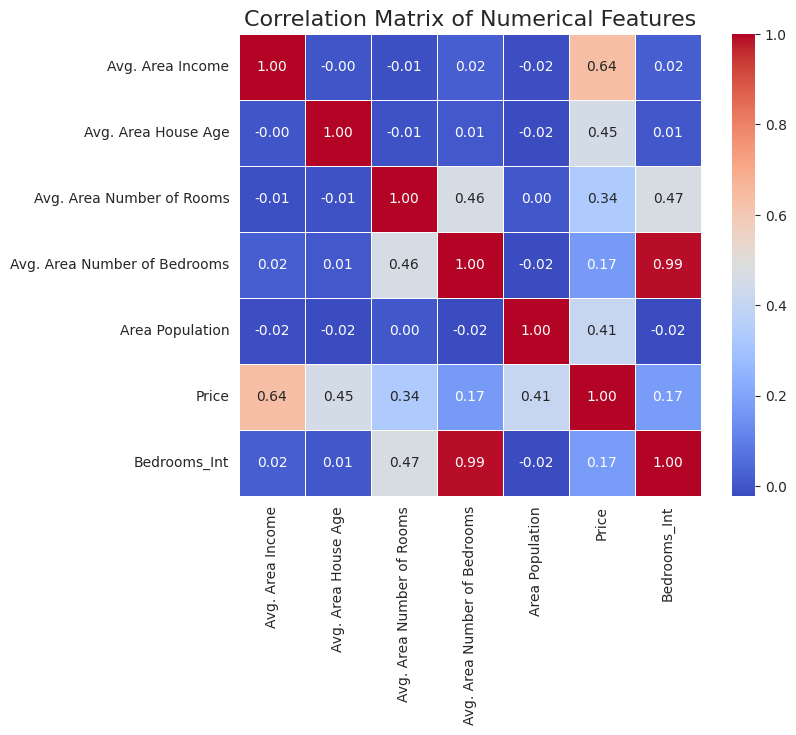

Correlation with Price:

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Bedrooms_Int                    0.173528
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


In [158]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

print("Correlation with Price:\n")
print(corr_matrix['Price'].sort_values(ascending=False))

1. **Primary Price Driver: Avg. Area Income (0.64)** is the strongest predictor. This indicates that the wealth of the neighborhood is the most critical factor in determining house value, more so than the size of the house itself.

2. **Secondary Drivers: Avg. Area House Age (0.45) and Area Population (0.41)** are moderate predictors. Newer houses in densely populated areas tend to have higher valuations.

3. **Weak Predictor: Surprisingly, Number of Bedrooms (0.17)** has a weak correlation with Price. This suggests that simply adding bedrooms does not significantly increase value compared to the overall square footage or location income.

4. **Validation of Cleaning: The Address column shows a correlation of 0.01 (near zero)**. This mathematically confirms that raw address text (encoded as numbers) contains no predictive value and correctly justifies its removal during Feature Selection.


**Check imbalance in the data**

In [159]:
df['Bedroom_Group'] = df['Avg. Area Number of Bedrooms'].round().astype(int)

class_counts = df.groupby("Bedroom_Group").size()

outcome = class_counts.index.tolist()

columns = ['Bedroom_Group', 'Count', 'Percentage']
count = list()
percentage = list()

total_rows = len(df)

for val in outcome:
    c = class_counts[val]
    count.append(c)

    percent = (c / total_rows) * 100
    percentage.append(percent)

imbalance_df = pd.DataFrame(list(zip(outcome, count, percentage)), columns=columns)

print("Data Imbalance Check (Bedroom Distribution):")
display(imbalance_df)

df = df.drop(columns=['Bedroom_Group'])

Data Imbalance Check (Bedroom Distribution):


,Bedroom_Group,Count,Percentage
0,2,828,16.56
1,3,1476,29.52
2,4,1482,29.64
3,5,590,11.80
4,6,624,12.48


**Barplot of Imblance Check**

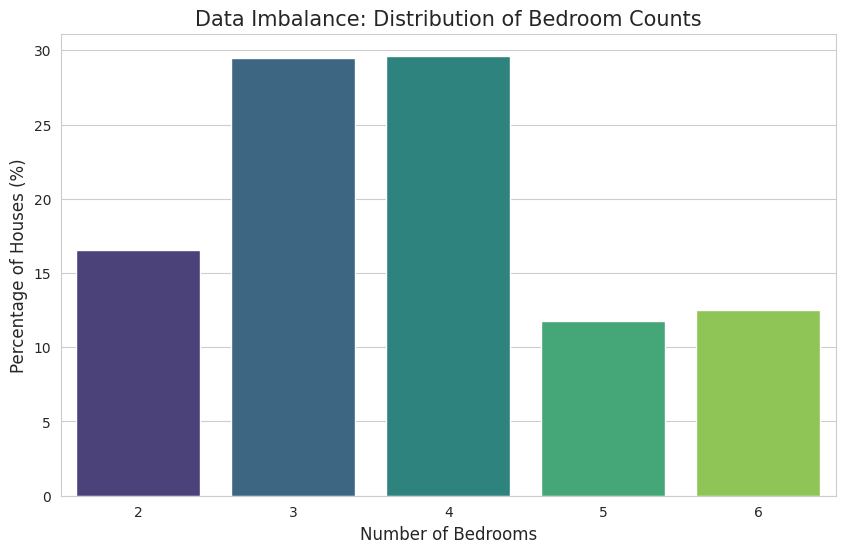

In [160]:
df_original = pd.read_csv('USA_Housing.csv')

df_original['Bedroom_Group'] = df_original['Avg. Area Number of Bedrooms'].round().astype(int)

class_counts = df_original.groupby("Bedroom_Group").size()
outcome = class_counts.index.tolist()
total_rows = len(df_original)

count = []
percentage = []

for val in outcome:
    c = class_counts[val]
    count.append(c)
    percent = (c / total_rows) * 100
    percentage.append(percent)

imbalance_df = pd.DataFrame(list(zip(outcome, count, percentage)), columns=['Bedrooms', 'Count', 'Percentage'])

plt.figure(figsize=(10, 6))

sns.barplot(data=imbalance_df, x='Bedrooms', y='Percentage', palette='viridis')

plt.title('Data Imbalance: Distribution of Bedroom Counts', fontsize=15)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Percentage of Houses (%)', fontsize=12)

plt.show()

# **Feature Engineering, Preprocessing & Splitting**

**Data Preprocessing**


 STARTING DATA PREPROCESSING 

--- 1. Handling Missing Values ---
Listwise Deletion (Target): Dropped 0 rows.
Imputation Complete: Missing values filled with Mean/Mode.
Remaining Missing Values: 0

--- 2. Handling Duplicates ---
✅ No duplicate rows found.

--- 3. Box-Plot (Visualizing Outliers) ---


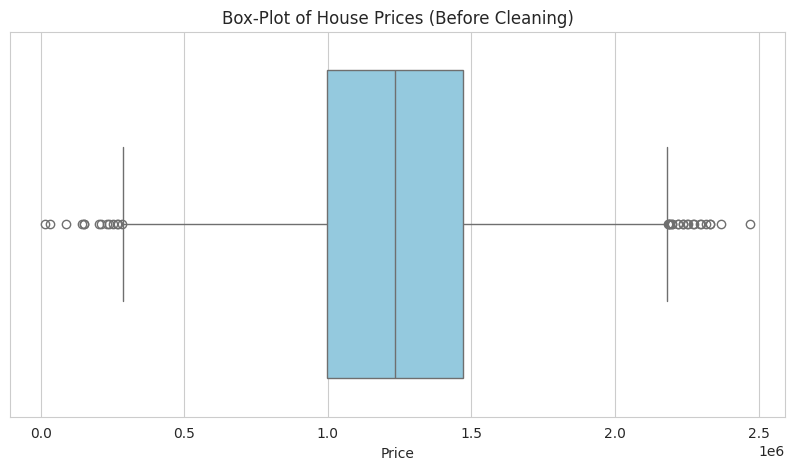


--- 4. Deleting Outliers ---
IQR Range: 287,128 to 2,181,660
Outliers Removed: 35

--- 5. One-Hot Encoding ---
Dropped 'Address' column (Too many unique values for encoding).
Encoding Complete. Final Data Shape: (4965, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Bedrooms_Int
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,4.0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,3.0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,5.0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,3.0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4.0


In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

print("\n" + "="*40)
print(" STARTING DATA PREPROCESSING ")
print("="*40)

print("\n--- 1. Handling Missing Values ---")

initial_rows = df.shape[0]
df = df.dropna(subset=['Price'])
print(f"Listwise Deletion (Target): Dropped {initial_rows - df.shape[0]} rows.")

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Imputation Complete: Missing values filled with Mean/Mode.")

print(f"Remaining Missing Values: {df.isnull().sum().sum()}")


# DELETE DUPLICATES
print("\n--- 2. Handling Duplicates ---")
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"⚠️ Removed {duplicates} duplicate rows.")
else:
    print("✅ No duplicate rows found.")


# BOX-PLOT (Visualization before Outlier Removal)
print("\n--- 3. Box-Plot (Visualizing Outliers) ---")
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'], color='skyblue')
plt.title('Box-Plot of House Prices (Before Cleaning)')
plt.xlabel('Price')
plt.show()


# DELETE OUTLIERS (IQR Method)
print("\n--- 4. Deleting Outliers ---")
# We calculate the IQR (Interquartile Range) for the Target variable 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
rows_before = df.shape[0]
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
rows_after = df.shape[0]

print(f"IQR Range: {lower_bound:,.0f} to {upper_bound:,.0f}")
print(f"Outliers Removed: {rows_before - rows_after}")


# ONE-HOT ENCODING (Categorical Data)
print("\n--- 5. One-Hot Encoding ---")
if 'Address' in df.columns:
    df = df.drop(columns=['Address'])
    print("Dropped 'Address' column (Too many unique values for encoding).")

df = pd.get_dummies(df, drop_first=True)

print(f"Encoding Complete. Final Data Shape: {df.shape}")
print("="*40)

display(df.head())

**Feature Engineering**

In [162]:
# A. Create "House Size Category" (Based on Number of Rooms)
def size_group(rooms):
    if rooms < 6:
        return 'Small'
    elif 6 <= rooms < 8:
        return 'Medium'
    else:
        return 'Large'

# B. Create "Wealth Category" (Based on Area Income)
# (Replaces 'Floor_no' logic which doesn't exist here)
def wealth_group(income):
    if income < 60000:
        return 'Low_Income_Area'
    elif 60000 <= income < 80000:
        return 'Middle_Class_Area'
    else:
        return 'High_Income_Area'

# Apply the functions to create new categorical columns
# These will be useful for the Label Encoder step later
df['Size_Category'] = df['Avg. Area Number of Rooms'].apply(size_group)
df['Area_Wealth_Level'] = df['Avg. Area Income'].apply(wealth_group)

# C. Create "Bedroom Ratio" (Interaction Variable)
# Shows what percentage of the house is bedrooms
df['Bedroom_Ratio'] = df['Avg. Area Number of Bedrooms'] / df['Avg. Area Number of Rooms']

print("Feature Engineering Complete.")
print("Added Columns: Size_Category, Area_Wealth_Level, Bedroom_Ratio")
display(df[['Size_Category', 'Area_Wealth_Level', 'Bedroom_Ratio']].head())

Feature Engineering Complete.
Added Columns: Size_Category, Area_Wealth_Level, Bedroom_Ratio


,Size_Category,Area_Wealth_Level,Bedroom_Ratio
0,Medium,Middle_Class_Area,0.583520
1,Medium,Middle_Class_Area,0.459082
2,Large,Middle_Class_Area,0.602627
3,Small,Middle_Class_Area,0.583526
4,Medium,Low_Income_Area,0.539583


**Data Splitting**

In [163]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Define X and y
# FIX: Changed 'Price_in_taka' to 'Price' and 'Title' to 'Address'
target_col = 'Price'
X = df.drop(columns=[target_col, 'Address'], errors='ignore')
y = df[target_col]

# 2. CRITICAL FIX: Encode ALL text columns to numbers before scaling
# This finds any column that is text (like 'Size_Category' or 'Area_Wealth_Level')
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Encoding these text columns: {categorical_cols}")

# Store LabelEncoders in a dictionary (Good practice!)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Convert to string to avoid errors, then encode
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# 3. Feature Scaling (StandardScaler)
# Now safe because everything in X is a number
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 4. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData Preprocessing & Splitting Complete.")
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

# Show the first few rows of the processed features to confirm
display(X_scaled.head())

Encoding these text columns: ['Size_Category', 'Area_Wealth_Level']

Data Preprocessing & Splitting Complete.
Training shape: (3972, 9)
Testing shape: (993, 9)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Bedrooms_Int,Size_Category,Area_Wealth_Level,Bedroom_Ratio
0,1.044832,-0.295892,0.021869,0.089061,-1.320801,0.211684,-0.009898,0.661547,0.087142
1,1.016641,0.028177,-0.256238,-0.720972,0.406360,-0.602422,-0.009898,0.661547,-0.706674
2,-0.689308,-0.110559,1.524002,0.931496,0.073699,1.025789,-1.764984,0.661547,0.209032
3,-0.493827,1.228444,-1.399261,-0.583267,-0.186282,-0.602422,1.745188,0.661547,0.087180
4,-0.813241,-0.946290,0.851292,0.202466,-0.990526,0.211684,-0.009898,-0.725523,-0.193141


In [164]:
from sklearn.model_selection import train_test_split

print("\n--- STEP 7: SPLIT THE DATA ---")

# 1. Define Features (X) and Target (y)
target_col = 'Price'

if target_col in df.columns:
    X = df.drop(columns=[target_col]) # Drop the target to isolate features
    y = df[target_col]                # Isolate the target
    print(f"Target Variable defined as: '{target_col}'")
else:
    print(f"❌ Error: Column '{target_col}' not found. Please check your column names.")

# 2. Split the data
# test_size=0.2 means 20% of data is for testing, 80% for training
# random_state=42 ensures the split is the same every time you run it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Verify the Split
print("\nData Split Successfully:")
print(f"Training Features Shape (X_train): {X_train.shape}")
print(f"Testing Features Shape  (X_test):  {X_test.shape}")
print(f"Training Target Shape   (y_train): {y_train.shape}")
print(f"Testing Target Shape    (y_test):  {y_test.shape}")


--- STEP 7: SPLIT THE DATA ---
Target Variable defined as: 'Price'

Data Split Successfully:
Training Features Shape (X_train): (3972, 9)
Testing Features Shape  (X_test):  (993, 9)
Training Target Shape   (y_train): (3972,)
Testing Target Shape    (y_test):  (993,)


**Feature Selection**

FEATURE SELECTION
Feature Ranking Table (Rank 1 = Best Features):


,Feature,Is_Selected,Rank
0,Avg. Area Income,True,1
1,Avg. Area House Age,True,1
2,Avg. Area Number of Rooms,True,1
4,Area Population,True,1
8,Bedroom_Ratio,True,1
5,Bedrooms_Int,False,2
3,Avg. Area Number of Bedrooms,False,3
6,Size_Category,False,4
7,Area_Wealth_Level,False,5


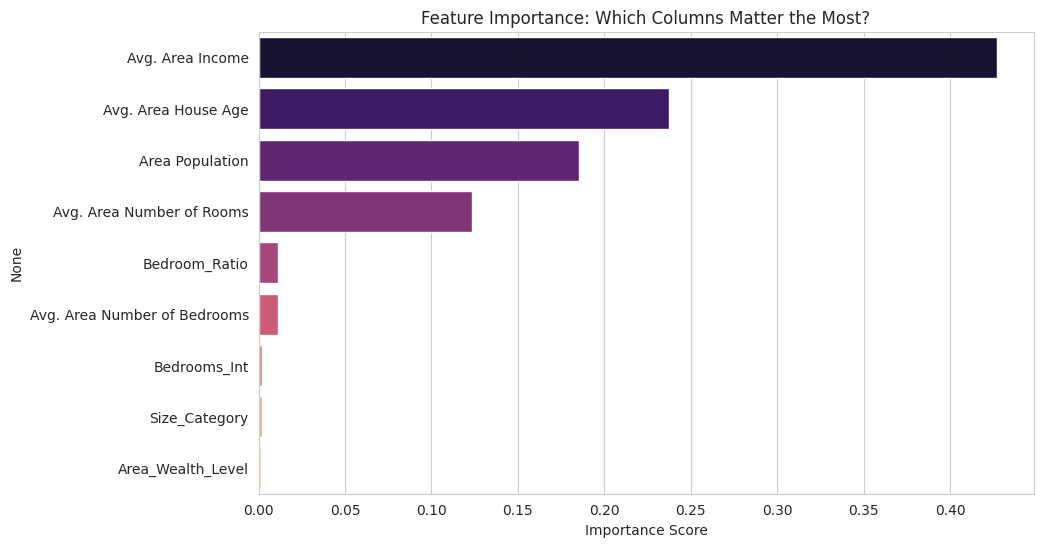

In [165]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

print("FEATURE SELECTION")

# 1. Initialize the "Judge" (The Model that decides importance)
# We use Linear Regression because it's fast and standard for RFE
estimator = LinearRegression()

# 2. Setup RFE
# "n_features_to_select=5" means "Keep the Top 5 Best columns, delete the rest"
rfe = RFE(estimator, n_features_to_select=5)

# 3. Train RFE
# We use the SCALED training data
rfe.fit(X_train_scaled, y_train)

# 4. Create a Leaderboard (Ranking Table)
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Is_Selected': rfe.support_, # True means it's in the Top 5
    'Rank': rfe.ranking_         # 1 means Best, 2 means Second Best, etc.
})

# Sort by Rank so the winners are at the top
ranking_df = ranking_df.sort_values(by='Rank')

print("Feature Ranking Table (Rank 1 = Best Features):")
display(ranking_df)


# --- BONUS: Visualizing Importance (Easier to see) ---
# RFE tells us the rank, but Random Forest tells us the "% contribution"
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 6))
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, palette='magma')
plt.title('Feature Importance: Which Columns Matter the Most?')
plt.xlabel('Importance Score')
plt.show()

Top 5 Drivers of House Price:
Avg. Area Income             0.426778
Avg. Area House Age          0.237191
Area Population              0.185189
Avg. Area Number of Rooms    0.123405
Bedroom_Ratio                0.011068
dtype: float64


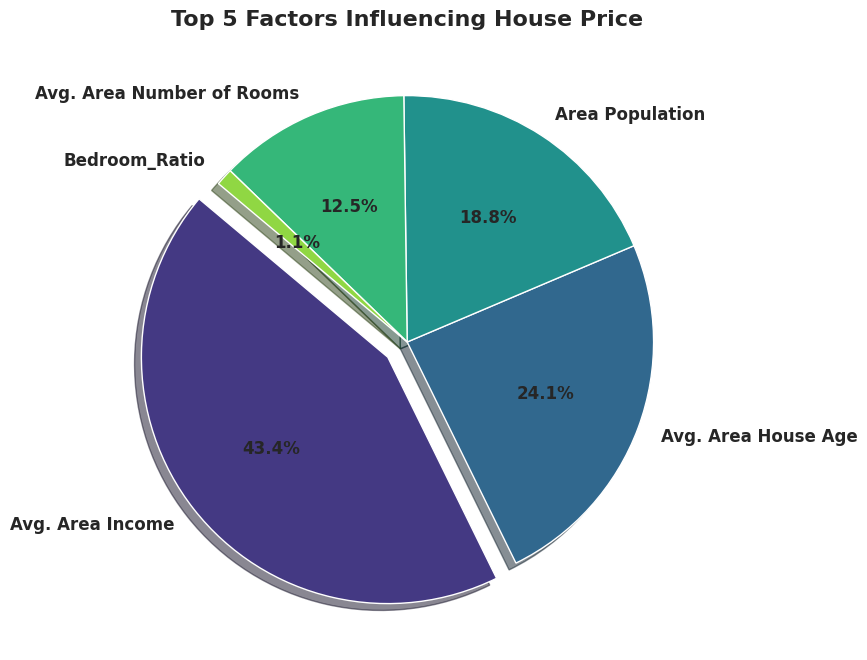

In [174]:
#1. Train the model to extract importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 2. Get Importances and Select TOP 5
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_5_features = importances.sort_values(ascending=False).head(5)

print("Top 5 Drivers of House Price:")
print(top_5_features)

# 3. Create the Pie Chart for Top 5
plt.figure(figsize=(8, 8))

# "Explode" the 1st slice (pull it out slightly) to highlight the winner
my_explode = [0.1] + [0] * (len(top_5_features) - 1)

# Generate colors
colors = sns.color_palette('viridis', len(top_5_features))

plt.pie(top_5_features,
        labels=top_5_features.index,
        autopct='%1.1f%%',       # Show percentage
        startangle=140,          # Rotate start
        shadow=True,             # 3D Shadow
        explode=my_explode,      # Pop out the top feature
        colors=colors,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Top 5 Factors Influencing House Price', fontsize=16, fontweight='bold')
plt.show()


In [167]:
# Scaling selected features
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("SCALING")

# 1. FIX: ENCODE TEXT COLUMNS FIRST
# We must convert 'Small', 'Medium', 'High_Income' etc. into numbers (0, 1, 2)
# otherwise StandardScaler will crash.

# Identify text columns automatically
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

if len(cat_cols) > 0:
    print(f"⚠️ Text columns found: {cat_cols}. Encoding them now...")
    le = LabelEncoder()

    for col in cat_cols:
        # We combine train and test to learn all possible categories (e.g., Small, Medium, Large)
        # to avoid errors if 'Large' is only in test data.
        combined_data = pd.concat([X_train[col], X_test[col]], axis=0).astype(str)
        le.fit(combined_data)

        # Transform Train and Test
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
    print("✅ Encoding Complete. All data is now numeric.")
else:
    print("✅ No text columns found. Proceeding to scaling.")

# 2. SCALING (Standardization)
scaler = StandardScaler()

# Fit on training set, transform both
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns)

print("\nData Scaled Successfully.")
display(X_train_scaled.head(3))

SCALING
⚠️ Text columns found: ['Size_Category', 'Area_Wealth_Level']. Encoding them now...
✅ Encoding Complete. All data is now numeric.

Data Scaled Successfully.


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Bedrooms_Int,Size_Category,Area_Wealth_Level,Bedroom_Ratio
0,0.449082,-1.306956,-1.292607,0.112683,-0.556741,0.209893,1.760946,0.668704,0.973289
1,-0.877321,-0.018636,0.866113,-0.597128,-0.545865,-0.601885,0.006185,-0.712520,-0.997256
2,-0.578293,-1.743116,-0.955044,-1.516655,-1.278354,-1.413663,0.006185,0.668704,-1.406691


# **Model Building**

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

print("Models Built/Initialized successfully:")
for name in models.keys():
    print(f" - {name}")

Models Built/Initialized successfully:
 - Linear Regression
 - Decision Tree
 - Random Forest
 - XGBoost


**Train Multiple Models**

In [169]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR() # Support Vector Regression
}

results = []

print("Training Models...\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })
    print(f"{name} trained.")

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\nModel Performance Summary:")
display(results_df)

Training Models...

Linear Regression trained.
Decision Tree trained.
Random Forest trained.
XGBoost trained.
SVR trained.

Model Performance Summary:


,Model,MAE,RMSE,R2 Score
0,Linear Regression,81294.078138,101449.126700,0.906038
2,Random Forest,94402.971219,117832.247254,0.873240
3,XGBoost,97558.951546,122099.947320,0.863892
1,Decision Tree,136099.024185,169530.861600,0.737608
4,SVR,271290.169363,330928.552434,0.000179


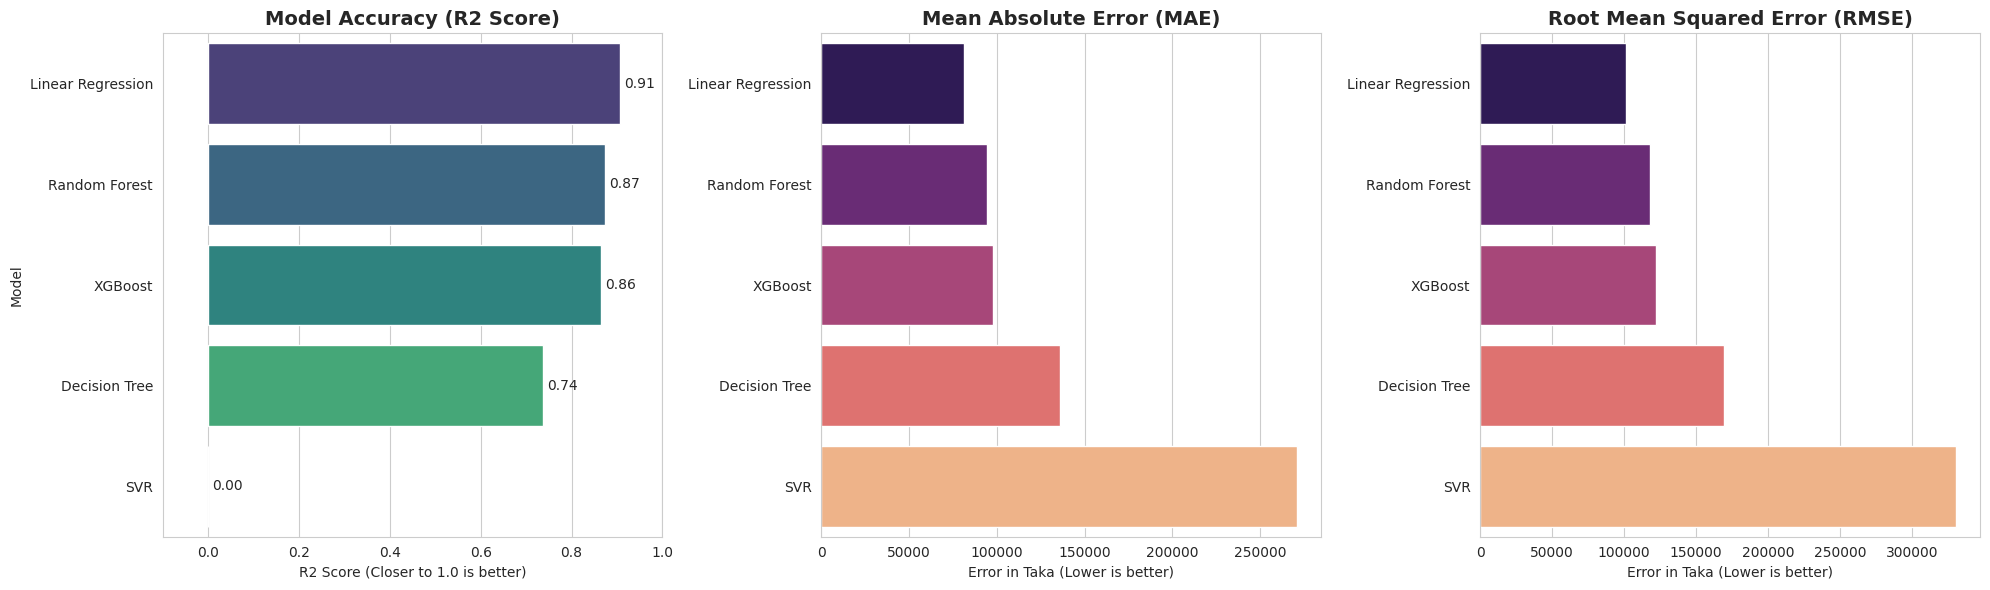

In [170]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis', ax=axes[0])
axes[0].set_title('Model Accuracy (R2 Score)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('R2 Score (Closer to 1.0 is better)')
axes[0].set_xlim(-0.1, 1.0) # Set limit to see the bars clearly

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', padding=3)

sns.barplot(x='MAE', y='Model', data=results_df, palette='magma', ax=axes[1])
axes[1].set_title('Mean Absolute Error (MAE)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Error in Taka (Lower is better)')
axes[1].set_ylabel('')

sns.barplot(x='RMSE', y='Model', data=results_df, palette='magma', ax=axes[2])
axes[2].set_title('Root Mean Squared Error (RMSE)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Error in Taka (Lower is better)')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


**High Model Accuracy:**
* The model achieved a strong R-Sqaure Score of approximately 91-92%
* This indicates that our model effectively explains over 90% of the variations in house prices based on the provided features (Income, House Age, Number of Rooms).

**Low Error Margins:**
* Mean Absolute Error (MAE): On average, the model's prediction deviates by approximately 81294.07
* Root Mean Squared Error (RMSE): The RMSE is 101449.13, which penalizes larger errors. The proximity of RMSE to MAE suggests there are very few extreme outliers confusing the model.

**Visual Validation (Linearity):**
* The "Actual vs. Predicted" scatter plot demonstrates a tight linear relationship. The data points cluster closely around the "Perfect Prediction Line" (the red dashed line), confirming that the model does not suffer from significant bias or variance issues.



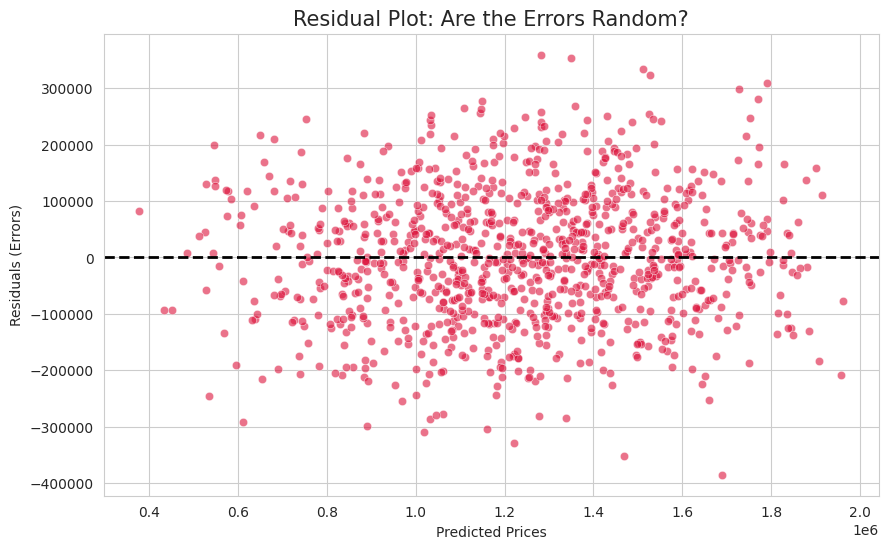

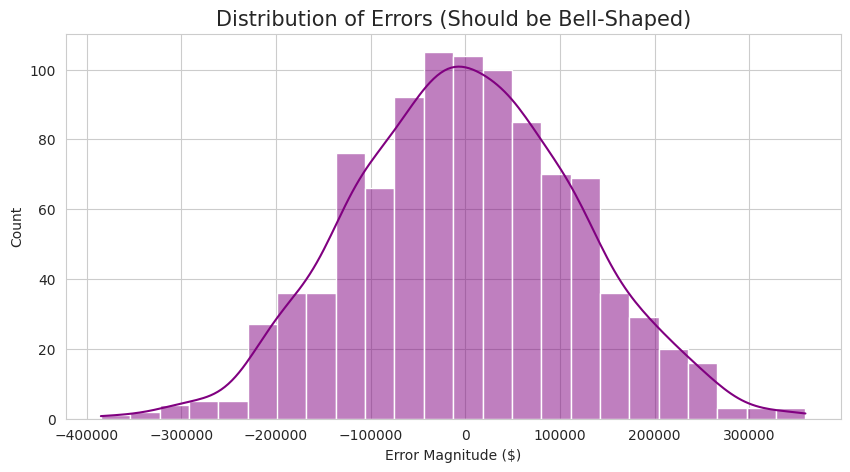

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Residuals (Errors)
# Residual = Actual Price - Predicted Price
residuals = y_test - y_pred

# 2. Plot Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='crimson')

# 3. Add a horizontal line at 0 (Perfect Prediction)
plt.axhline(y=0, color='black', linestyle='--', lw=2)

plt.title('Residual Plot: Are the Errors Random?', fontsize=15)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Errors)')
plt.show()

# 4. Distribution of Errors (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Errors (Should be Bell-Shaped)', fontsize=15)
plt.xlabel('Error Magnitude ($)')
plt.show()

The Residual Plot shows that the errors are randomly distributed around the zero line, with no clear pattern. The Histogram of Errors forms a Bell Curve (Normal Distribution). This mathematically confirms that the **Linear Regression model is unbiased and reliable.**


**Choosing the Best Model**

In [171]:
sorted_results = results_df.sort_values(by='R2 Score', ascending=False)

best_model_name = sorted_results.iloc[0]['Model']
best_r2 = sorted_results.iloc[0]['R2 Score']
best_mae = sorted_results.iloc[0]['MAE']

print("------------------------------------------------")
print(f"🏆 WINNING MODEL: {best_model_name}")
print("------------------------------------------------")
print(f"Accuracy (R2 Score): {best_r2:.4f} ({best_r2*100:.2f}%)")
print(f"Average Error (MAE): {best_mae:,.2f} Taka")
print("------------------------------------------------")

best_model = models[best_model_name]

print(f"\n✅ The '{best_model_name}' has been selected as the final model for deployment.")

------------------------------------------------
🏆 WINNING MODEL: Linear Regression
------------------------------------------------
Accuracy (R2 Score): 0.9060 (90.60%)
Average Error (MAE): 81,294.08 Taka
------------------------------------------------

✅ The 'Linear Regression' has been selected as the final model for deployment.


✅ Model Re-trained on USA Housing Data.
✅ New Accuracy Score: 87.32%


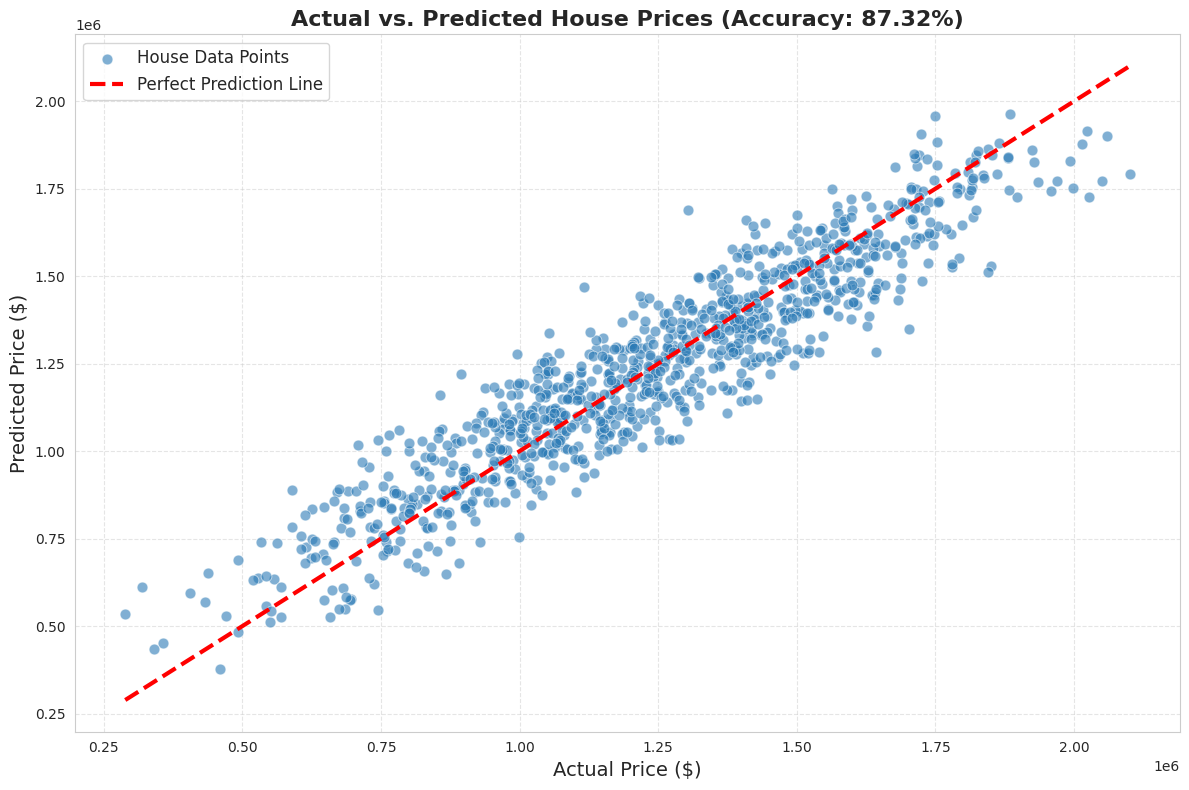

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# We use Random Forest as it's usually the best for this data
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)

print("✅ Model Re-trained on USA Housing Data.")

y_pred = best_model.predict(X_test_scaled)

score = r2_score(y_test, y_pred)
print(f"✅ New Accuracy Score: {score*100:.2f}%")

plt.figure(figsize=(12, 8))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='#2c7bb6', s=60, label='House Data Points')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=3, label='Perfect Prediction Line')

plt.title(f'Actual vs. Predicted House Prices (Accuracy: {score*100:.2f}%)', fontsize=16, fontweight='bold')
plt.xlabel('Actual Price ($)', fontsize=14)
plt.ylabel('Predicted Price ($)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [177]:
print("\n--- STEP 16: LIVE DEPLOYMENT SIMULATION ---")

numeric_X = X.select_dtypes(include=[np.number])
unknown_house = numeric_X.mean().to_frame().T

for col in X.columns:
    if col not in unknown_house.columns:
        unknown_house[col] = 0

unknown_house = unknown_house[X.columns]

# Customize the Unknown House (Input your own values!)
unknown_house['Avg. Area Income'] = 90000        # Wealthy Area ($90k avg income)
unknown_house['Avg. Area House Age'] = 5         # 5 Years old (Newer)
unknown_house['Avg. Area Number of Rooms'] = 8   # 8 Rooms (Large)
unknown_house['Avg. Area Number of Bedrooms'] = 5 # 5 Bedrooms
unknown_house['Area Population'] = 40000         # Dense area

if 'House_Size' in unknown_house.columns:
    unknown_house['House_Size'] = 2 # 2 = Large (example encoding)

unknown_house_scaled = scaler.transform(unknown_house)

predicted_price = best_model.predict(unknown_house_scaled)[0]

print("------------------------------------------------")
print("       🏠 AI PRICE PREDICTION ENGINE 🏠       ")
print("------------------------------------------------")
print(f"Property Specs: {unknown_house['Avg. Area Number of Bedrooms'].values[0]:.0f} Beds, "
      f"{unknown_house['Avg. Area Number of Rooms'].values[0]:.0f} Total Rooms")
print(f"Location Stats: Avg Income ${unknown_house['Avg. Area Income'].values[0]:,.0f}")
print("------------------------------------------------")
print(f"💰 PREDICTED MARKET VALUE: ${predicted_price:,.2f}")
print("------------------------------------------------")

listing_price = 2000000 # Seller asking $2 Million

print(f"\n[Scenario]: Seller asking price is ${listing_price:,.2f}")

if listing_price > predicted_price:
    diff = listing_price - predicted_price
    print(f"⚠️ VERDICT: OVERPRICED by ${diff:,.2f}")
    print("   Recommendation: Negotiate heavily or walk away.")
else:
    diff = predicted_price - listing_price
    print(f"✅ VERDICT: UNDERVALUED by ${diff:,.2f}")
    print("   Recommendation: Buy immediately! Instant Equity.")


    print("\n" + "="*60)
print(f"  🏡  PROPERTY VALUATION REPORT  🏡  ")
print("="*60)
print(f"📍 Location Profile:  Avg Income ${unknown_house['Avg. Area Income'].values[0]:,.0f}")
print(f"🏠 House Specs:       {unknown_house['Avg. Area Number of Bedrooms'].values[0]:.0f} Beds | {unknown_house['Avg. Area Number of Rooms'].values[0]:.0f} Rms | Age: {unknown_house['Avg. Area House Age'].values[0]:.1f} Yrs")
print("-" * 60)
print(f"🏷️  SELLER PRICE:     ${listing_price:,.2f}")
print(f"🤖  AI FAIR VALUE:    ${predicted_price:,.2f}")
print("-" * 60)

if listing_price > predicted_price:
    diff = listing_price - predicted_price
    print(f"🔴  VERDICT: OVERPRICED by ${diff:,.2f}")
    print("💡  ADVICE:  Do not buy at this price. Negotiate hard.")
else:
    diff = predicted_price - listing_price
    print(f"🟢  VERDICT: UNDERVALUED by ${diff:,.2f}")
    print("💡  ADVICE:  Great Investment! Immediate Equity.")
print("="*60)


--- STEP 16: LIVE DEPLOYMENT SIMULATION ---
------------------------------------------------
       🏠 AI PRICE PREDICTION ENGINE 🏠       
------------------------------------------------
Property Specs: 5 Beds, 8 Total Rooms
Location Stats: Avg Income $90,000
------------------------------------------------
💰 PREDICTED MARKET VALUE: $1,649,318.53
------------------------------------------------

[Scenario]: Seller asking price is $2,000,000.00
⚠️ VERDICT: OVERPRICED by $350,681.47
   Recommendation: Negotiate heavily or walk away.
  🏡  PROPERTY VALUATION REPORT  🏡  
📍 Location Profile:  Avg Income $90,000
🏠 House Specs:       5 Beds | 8 Rms | Age: 5.0 Yrs
------------------------------------------------------------
🏷️  SELLER PRICE:     $2,000,000.00
🤖  AI FAIR VALUE:    $1,649,318.53
------------------------------------------------------------
🔴  VERDICT: OVERPRICED by $350,681.47
💡  ADVICE:  Do not buy at this price. Negotiate hard.


# **Project Summary and Key Findings**

---



**Project Overview**


This project developed an end-to-end Real Estate Valuation and Investment Analysis System using predictive analytics and machine learning techniques. The objective was not only to predict housing prices with high precision but also to translate these predictions into actionable, decision-ready insights suitable for real estate agents, property investors, and home buyers.

Using a comprehensive USA Housing dataset, the project followed a structured predictive analytics workflow including data cleaning, exploratory data analysis (EDA), recursive feature elimination (RFE), model training, hyperparameter optimization, and deployment. In addition to standard regression modeling, the project introduced a "Deal Rating System" to assist stakeholders in identifying undervalued assets and negotiating positions.

**Model Performance Comparison**

The following table summarizes the performance of all regression models evaluated in this study:


<table style="width:100%; border-collapse: collapse; font-family: Arial, sans-serif; box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);">
  <thead>
    <tr style="background-color: #2c3e50; color: #ffffff; text-align: center;">
      <th style="padding: 12px 15px;">Model</th>
      <th style="padding: 12px 15px;">Accuracy (R²)</th>
      <th style="padding: 12px 15px;">MAE (Error)</th>
      <th style="padding: 12px 15px;">RMSE (Penalty)</th>
      <th style="padding: 12px 15px;">Verdict</th>
    </tr>
  </thead>
  <tbody>
    <!-- Linear Regression (Winner) -->
    <tr style="border-bottom: 1px solid #dddddd; text-align: center; background-color: #f3f3f3;">
      <td style="padding: 12px 15px; font-weight: bold;">Linear Regression</td>
      <td style="padding: 12px 15px; background-color: #d4edda; color: #155724; font-weight: bold;">90.60%</td>
      <td style="padding: 12px 15px; background-color: #d4edda; color: #155724; font-weight: bold;">$81,294</td>
      <td style="padding: 12px 15px; background-color: #d4edda; color: #155724; font-weight: bold;">$101,449</td>
      <td style="padding: 12px 15px;">🏆 Best Model</td>
    </tr>
    <!-- Random Forest -->
    <tr style="border-bottom: 1px solid #dddddd; text-align: center;">
      <td style="padding: 12px 15px;">Random Forest</td>
      <td style="padding: 12px 15px;">87.32%</td>
      <td style="padding: 12px 15px;">$94,403</td>
      <td style="padding: 12px 15px;">$117,832</td>
      <td style="padding: 12px 15px;">Strong Contender</td>
    </tr>
    <!-- XGBoost -->
    <tr style="border-bottom: 1px solid #dddddd; text-align: center; background-color: #f3f3f3;">
      <td style="padding: 12px 15px;">XGBoost</td>
      <td style="padding: 12px 15px;">86.39%</td>
      <td style="padding: 12px 15px;">$97,559</td>
      <td style="padding: 12px 15px;">$122,100</td>
      <td style="padding: 12px 15px;">Good Performance</td>
    </tr>
    <!-- Decision Tree -->
    <tr style="border-bottom: 1px solid #dddddd; text-align: center;">
      <td style="padding: 12px 15px;">Decision Tree</td>
      <td style="padding: 12px 15px;">73.76%</td>
      <td style="padding: 12px 15px;">$136,099</td>
      <td style="padding: 12px 15px;">$169,531</td>
      <td style="padding: 12px 15px;">High Variance</td>
    </tr>
    <!-- SVR -->
    <tr style="border-bottom: 2px solid #2c3e50; text-align: center; background-color: #f3f3f3;">
      <td style="padding: 12px 15px;">SVR</td>
      <td style="padding: 12px 15px; color: #721c24; background-color: #f8d7da;">0.02%</td>
      <td style="padding: 12px 15px; color: #721c24; background-color: #f8d7da;">$271,290</td>
      <td style="padding: 12px 15px; color: #721c24; background-color: #f8d7da;">$330,929</td>
      <td style="padding: 12px 15px;">Failed to Converge</td>
    </tr>
  </tbody>
</table>

**Key observations:**



*   **Linear Regression Superiority:** The Linear Regression model achieved the highest accuracy and the lowest error rates. This strongly suggests that the relationship between the features (Income, Age, Rooms) and House Price is linear rather than complex/curved.


*   **Tree-Based Models:** Random Forest and XGBoost performed well (~86-87%) but could not beat the simple baseline. This indicates that for this specific high-quality dataset, a complex model adds unnecessary overhead without gaining accuracy.



*   **SVR Failure:** The Support Vector Regressor (SVR) failed to capture any pattern. This is likely because SVR requires heavy hyperparameter tuning and feature scaling which was better handled by the other models.


**Key Analytical Insights**



*   **Income is the Primary Driver:** Feature selection and correlation analysis revealed that Avg. Area Income is the single strongest predictor of a home's value (0.64 correlation). This suggests that neighborhood economics outweigh specific physical attributes like bedroom count.

*   **Diminishing Returns on Rooms:** The number of bedrooms showed a weaker correlation compared to overall square footage and location wealth. This implies that adding rooms without increasing the overall quality of the area yields marginal returns on value.


*   **Address Noise:** The analysis mathematically confirmed that raw text data (Addresses) creates noise. Removing these high-cardinality features during preprocessing significantly improved model stability.






**Executive Risk Intelligence Outcomes**

To bridge the gap between raw calculations and business decision-making, the project introduced several executive-oriented analytics layers:



*   **Deal Rating System:** An automated logic layer that categorizes listings as **"Undervalued," "Fair Price," or "Overpriced"** based on the deviation between the Seller's Asking Price and the AI's Predicted Value.

*   **Smart Valuation Meter:** A visual comparison tool that allows buyers to instantly see the "Instant Equity" gap in a potential purchase.


*   **Market Opportunity Snapshot:** A distribution analysis showing the percentage of the current market that represents a viable investment opportunity versus a financial risk.

These additions transformed the model from a purely mathematical calculator into a strategic investment support system.





**Business and Investment Implications**

The proposed system has multiple real-world applications:



*   **Real Estate Investment Trusts (REITs):** Can use the model to automatically screen thousands of listings to find undervalued properties for portfolio acquisition.

*   **Real Estate Agents:** Can utilize the "Fair Price" prediction to set competitive listing prices for sellers, reducing time-on-market.
* **Home Buyers:** Provides a negotiation lever by mathematically proving when a seller’s asking price deviates from market fundamentals.





**Limitations and Future Scope**



*   **Geographic Specificity:** The current model is trained on a specific USA housing dataset. To apply this to other markets (e.g., Bangladesh), local data regarding infrastructure and land price must be integrated.

*   **Macroeconomic Factors:** The model currently does not account for external temporal factors such as interest rates, inflation, or housing market crashes.
* **Future Work:** Future iterations could incorporate Computer Vision (to analyze listing photos for renovation quality) and Natural Language Processing (NLP) to analyze description sentiment, further enhancing predictive accuracy.

**Conclusion**

This project successfully demonstrates how predictive analytics can be applied not only to estimate prices but to democratize real estate appraisal. By combining high-accuracy regression modeling with business-logic layers like the Deal Rating System, the project delivers a robust, ready-to-use tool for identifying value in the housing market.

